In [1]:
import sys

# Add the parent directory to the system path to allow importing from modules located there
sys.path.insert(0, "..")

# Import necessary libraries
import pandas as pd
from likelihood.models.simulation import SimulationEngine
import numpy as np
import matplotlib.pyplot as plt

# Set font size and style for plots
plt.rcParams["font.size"] = 24
plt.style.use("seaborn-v0_8")

In [2]:
# Load data from a parquet file into a pandas DataFrame
data = pd.read_parquet("./sample_data.parquet")
df = pd.DataFrame(data)
# Display the first few rows of the dataframe to verify it's loaded correctly
df.head()

,Color,Tamaño,Género,Edad,Precio,Cantidad
0,Rojo,Pequeño,Mujer,25,100.50,5
1,Azul,Mediano,Hombre,30,150.75,10
2,Rojo,Grande,Mujer,22,200.00,3
3,Verde,Mediano,Hombre,35,80.25,8
4,Rojo,Pequeño,Mujer,28,120.00,7


In [3]:
# Sample one row from the dataframe for demonstration purposes
df_aux = df.sample(1)
# Display the sampled row
df_aux.head()

,Color,Tamaño,Género,Edad,Precio,Cantidad
12,Azul,Pequeño,Hombre,29,125.0,8


Cumulative Distribution Function (Edad)


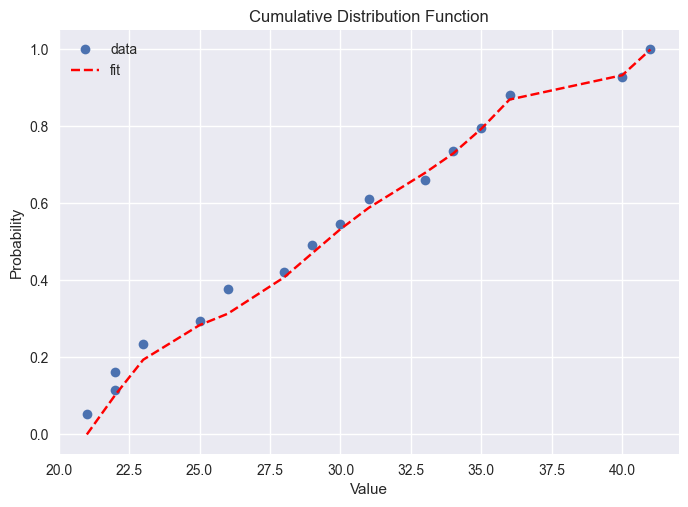

Cumulative Distribution Function (Precio)


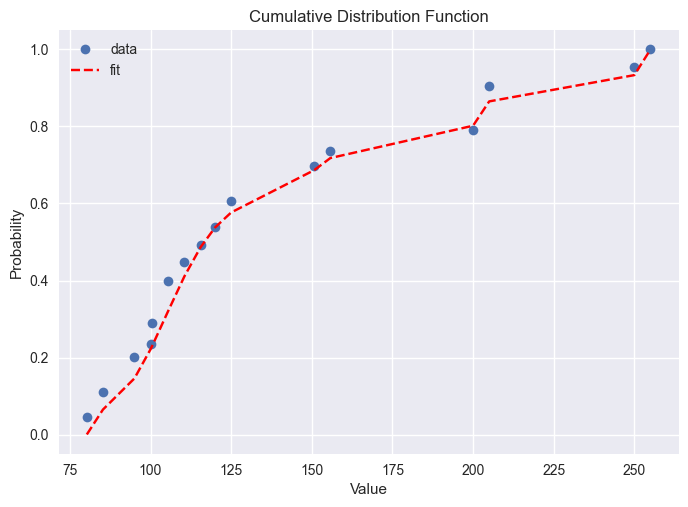

Cumulative Distribution Function (Cantidad)


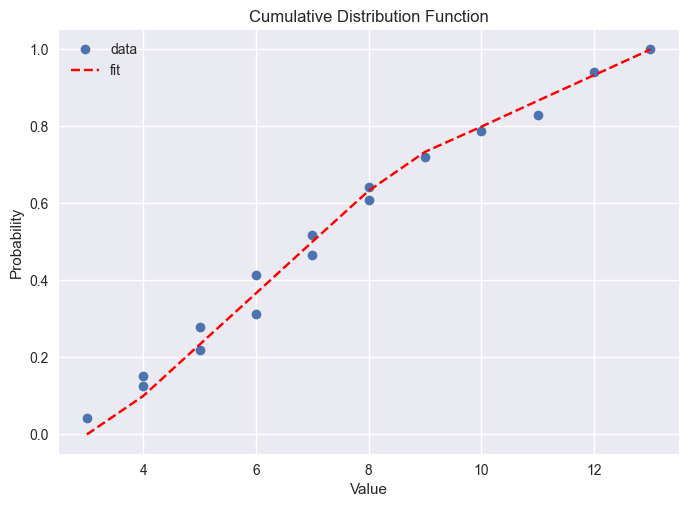

The predicted value is 81.15
The probability of this value is:  23.84%
The variable is an inlier


In [4]:
# Initialize the SimulationEngine model
model = SimulationEngine()
# Fit the model on the data, specifying number of important features and enabling plot visualization
model.fit(df=df, n_importances=3, plot=True)

# Define the target variable for prediction
variable = "Precio"
# Drop the target variable from the auxiliary dataframe to use it as input for prediction
df_aux.drop(columns=variable, inplace=True)
# Predict the value of the target variable using the fitted model
pred = model.predict(df=df_aux, column=variable)

# Print the predicted value formatted to two decimal places
print("The predicted value is", "{0:.2f}".format(pred[0]))
# Calculate and print the probability of the predicted value occurring, formatted as a percentage with two decimal places
print("The probability of this value is: ", "{:.2%}".format(model.get_proba(pred, variable)[0]))
# Determine if the predicted value is considered an outlier and print the result
print(f"The variable is an {model.pred_outliers(pred, variable)[0]}")

In [5]:
# Save the trained model to a file for later use
model_path = "./simulation_model"
model.save(model_path)

# Load the saved model from the file to demonstrate loading functionality
model = SimulationEngine()
model = model.load(model_path)

In [6]:
# Recalculate and print the probability of the predicted value using the loaded model to verify consistency
print("The probability of this value is: ", "{:.2%}".format(model.get_proba(pred, variable)[0]))
# Re-determine if the predicted value is considered an outlier using the loaded model and print the result
print(f"The variable is an {model.pred_outliers(pred, variable)[0]}")

The probability of this value is:  23.84%
The variable is an inlier


In [7]:
# Example usage of get_proba and pred_outliers with different data (not related to the original dataframe)
print("The probability of this value is: ", "{:.2%}".format(model.get_proba("Naranja", "Color")[0]))
print(f"The variable is an {model.pred_outliers('Naranja', 'Color')[0]}")

The probability of this value is:  6.25%
The variable is an outlier
